<a href="https://colab.research.google.com/github/ClarisseAlvarenga/data_science_alura_cursos/blob/master/Deep_Learning_Previs%C3%A3o_com_Keras_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
URL = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU



In [3]:
#definindo padrões globais de gráficos
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 22

# **DEEP LEARNING: PREVISÃO COM KERAS**

## **AULA 01 - Pré-processamento**

In [4]:
passageiros = pd.read_csv(URL)

In [5]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


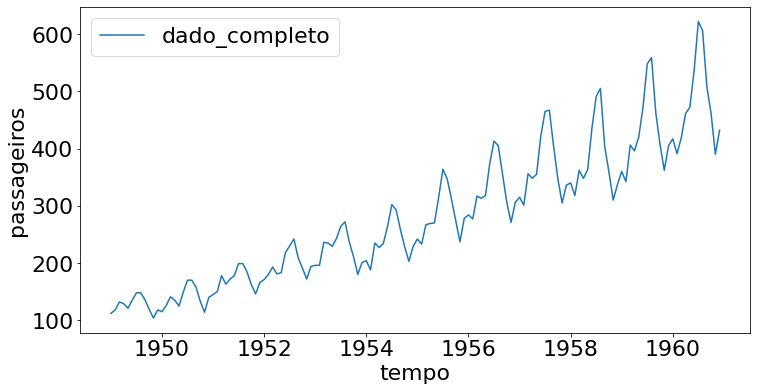

In [6]:
plt.figure(figsize=(12,6))
sns.lineplot(data=passageiros, x='tempo', y='passageiros', label='dado_completo');

In [7]:
#escalar os dados
sc = StandardScaler()
#ajustando o scaler aos dados
sc.fit(passageiros)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
dado_escalado = sc.transform(passageiros)

In [9]:
x = dado_escalado[:,0]
y = dado_escalado[:,1]

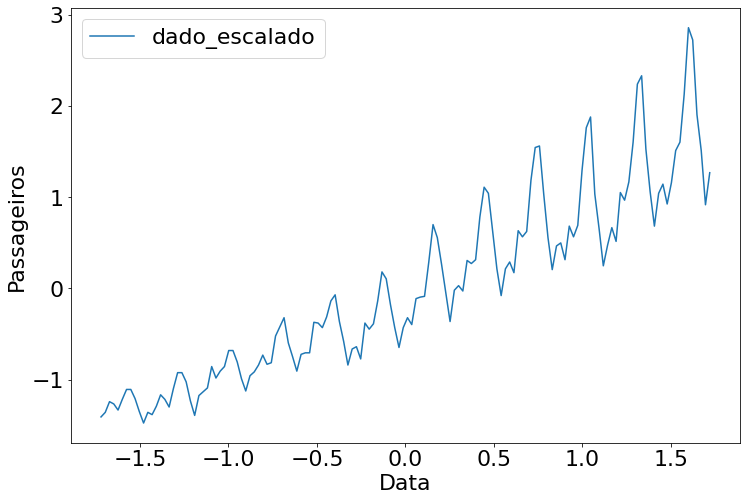

In [10]:
sns.lineplot(x=x,y=y, label='dado_escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data');

In [11]:
#criando variáveis para definir treino e teste
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [12]:
x_treino = x[0:tamanho_treino]
y_treino = y[0:tamanho_treino]
x_teste = x[tamanho_treino:len(passageiros)]
y_teste = y[tamanho_treino:len(passageiros)]


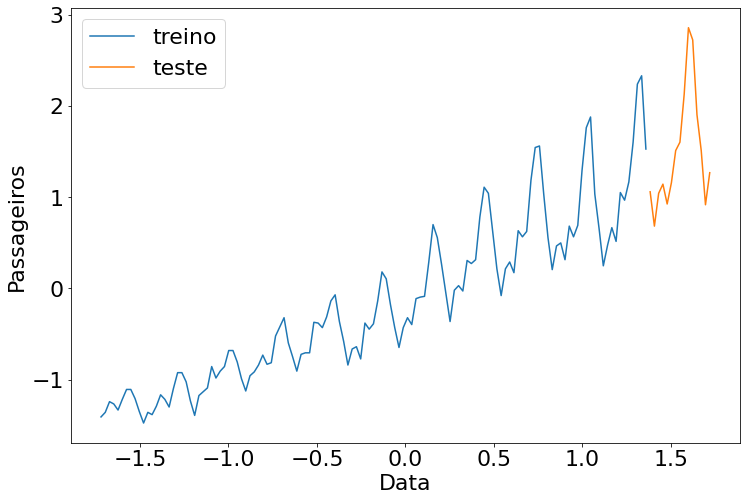

In [13]:
sns.lineplot(x=x_treino, y=y_treino, label='treino');
sns.lineplot(x=x_teste, y=y_teste, label='teste');
plt.ylabel('Passageiros')
plt.xlabel('Data');

## **AULA 02 - Regressão**

In [14]:
regressor = Sequential()
#incluindo uma camada densa, com uma entrada, uma dimensão, iniciando os pesos com 1, com viés e ativação linear
regressor.add(Dense(1,input_dim=1, kernel_initializer='Ones', use_bias=False, activation='linear'))

In [15]:
#compilando o modelo usando como função de erro o MSE e o otimizador o Adam
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [17]:
regressor.fit(x_treino, y_treino)

5/5 [==============================] - 0s 2ms/step - loss: 0.1285


In [18]:
y_predict = regressor.predict(x_treino)

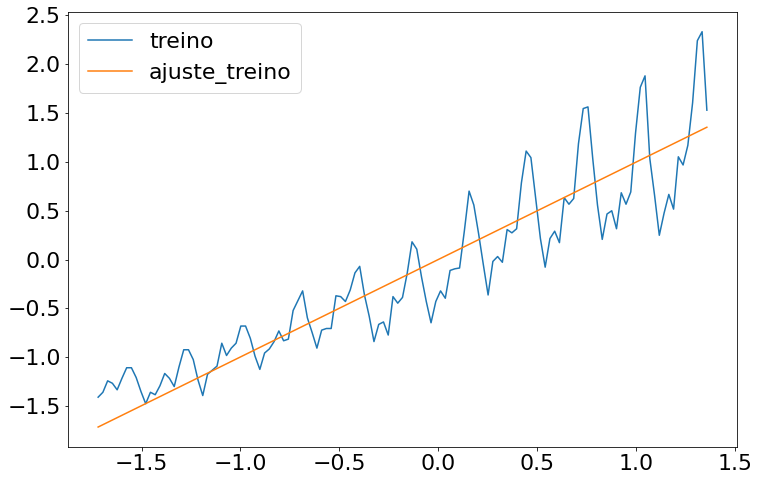

In [19]:
sns.lineplot(x=x_treino, y=y_treino, label='treino')
sns.lineplot(x=x_treino, y=y_predict[:,0], label='ajuste_treino');

In [20]:
#retornando aos valores originais
d= {'tempo': x_treino, 'passageiros':y_predict[:,0]}

In [21]:
resultados = pd.DataFrame(data=d)

In [22]:
resultados

,tempo,passageiros
0,-1.720064,-1.713153
1,-1.696007,-1.689193
2,-1.671950,-1.665232
3,-1.647894,-1.641272
4,-1.623837,-1.617312
...,...,...
124,1.262984,1.257909
125,1.287041,1.281870
126,1.311098,1.305830
127,1.335155,1.329790


In [23]:
resultados_transf = sc.inverse_transform(resultados)
resultado_transf = pd.DataFrame(resultados_transf)
resultado_transf.columns = ['tempo', 'passageiros']
resultado_transf

,tempo,passageiros
0,1949.000000,75.492854
1,1949.083333,78.357263
2,1949.166667,81.221686
3,1949.250000,84.086108
4,1949.333333,86.950531
...,...,...
124,1959.333333,430.680462
125,1959.416667,433.544885
126,1959.500000,436.409293
127,1959.583333,439.273702


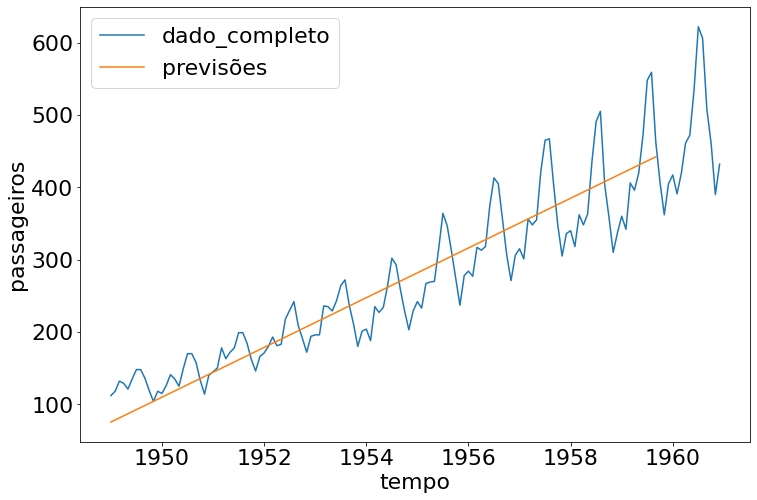

In [24]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo');
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='previsões');

In [25]:
#prevendo os dados de teste
y_predict_teste = regressor.predict(x_teste)

In [26]:
d = {'tempo': x_teste, 'passageiros':y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)

In [27]:
resultado_transf_teste = pd.DataFrame(sc.inverse_transform(resultados_teste))

In [28]:
resultado_transf_teste.columns = ['tempo', 'passageiros']
resultado_transf_teste

,tempo,passageiros
0,1959.750000,445.002534
1,1959.833333,447.866956
2,1959.916667,450.731365
3,1960.000000,453.595788
4,1960.083333,456.460211
5,1960.166667,459.324619
6,1960.250000,462.189042
7,1960.333333,465.053451
8,1960.416667,467.917859
9,1960.500000,470.782282


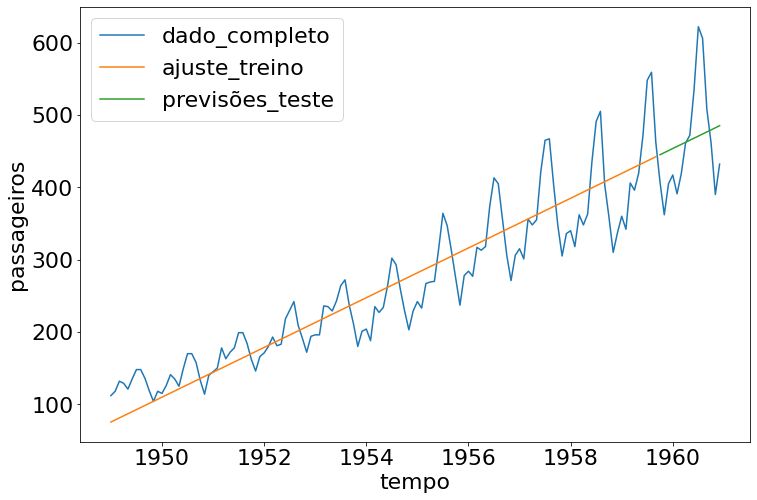

In [29]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo');
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_treino');
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf_teste, label='previsões_teste');


In [30]:
#criando uma nova rede neural 
regressor2 = Sequential()

In [31]:
#adicionando camadas
regressor2.add(Dense(8,input_dim=1, kernel_initializer='random_uniform',activation='sigmoid', use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
#camada de saída
regressor2.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [32]:
#compilando a nova rede
regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [33]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [34]:
#treinando a rede
regressor2.fit(x_treino, y_treino, epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7999
Epoch 2/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7962
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7926
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7906
Epoch 5/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7882
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7861
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7852
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7843
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7828
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7829
Epoch 11/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7811
Epoch 12/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7812
Epoch 13/500
5/5 [==============================] - 0s 2ms/st

In [35]:
#previsão treino teste
y_predict_treino_2 = regressor2.predict(x_treino)
y_predict_teste_2 = regressor2.predict(x_teste)

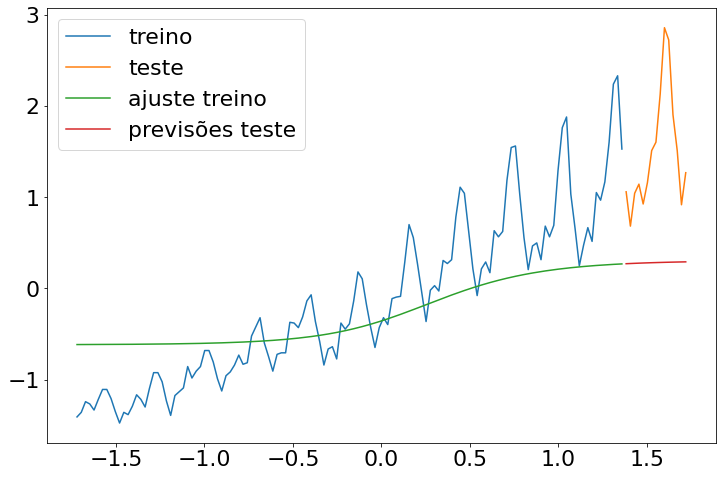

In [36]:
sns.lineplot(x=x_treino, y=y_treino, label='treino')
sns.lineplot(x=x_teste, y=y_teste, label='teste')
sns.lineplot(x=x_treino, y=y_predict_treino_2[:,0], label='ajuste treino')
sns.lineplot(x=x_teste, y=y_predict_teste_2[:,0], label='previsões teste');


## **AULA 03 - Reformulando o problema**

In [37]:
vetor = pd.DataFrame(y_treino)[0]

In [38]:
def separa_dados(vetor, n_passos):
  X_novo,y_novo = [],[]
  for i in range(n_passos, vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos: i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo)
  return X_novo, y_novo

In [39]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 1)

In [40]:
x_treino_novo[:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [41]:
y_treino_novo[:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [42]:
vetor_teste = pd.DataFrame(y_teste)[0]

In [43]:
x_teste_novo, y_teste_novo = separa_dados(vetor_teste,1)

In [44]:
regressor3 = Sequential()
regressor3.add(Dense(8,input_dim=1, kernel_initializer='Ones', activation='linear', use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor3.add(Dense(1,kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [45]:
regressor3.compile(loss='mean_squared_error', optimizer='adam')

In [46]:
regressor3.fit(x_treino_novo, y_treino_novo, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7871
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7587
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7352
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7139
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6930
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6671
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6423
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6153
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5854
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5546
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5216
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4875
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

In [47]:
y_predict_novo = regressor3.predict(x_treino_novo)

In [48]:
y_predict_teste_novo = regressor3.predict(x_teste_novo)
resultado= pd.DataFrame(y_predict_teste_novo)[0]

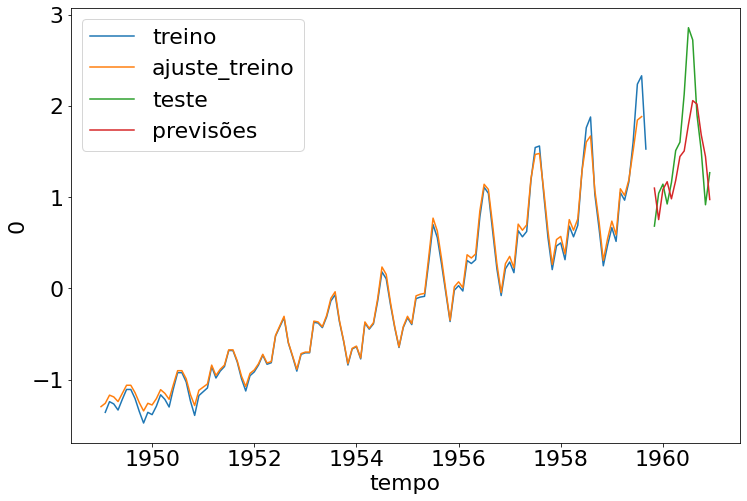

In [49]:
sns.lineplot(x='tempo', y=y_treino_novo, data = passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data = passageiros, label='ajuste_treino')
sns.lineplot(x='tempo', y=y_teste_novo, data = passageiros[130:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values,  data = passageiros[130:144], label='previsões');


In [50]:
#mudando a quantidade dos passos
x_treino_4_passos,y_treino_4_passos = separa_dados(vetor,4)
x_teste_4_passos,y_teste_4_passos = separa_dados(vetor_teste,4)
 

In [51]:
x_treino_4_passos[:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [52]:
regressor4 = Sequential()
regressor4.add(Dense(8,input_dim=4, kernel_initializer='Ones', activation='linear', use_bias=False)) #4 valores de entrada por linha
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor4.add(Dense(1,kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [53]:
regressor4.compile(loss='mean_squared_error', optimizer='adam')

In [54]:
regressor4.fit(x_treino_4_passos,y_treino_4_passos, epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7703
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 0.6717
Epoch 3/300
4/4 [==============================] - 0s 2ms/step - loss: 0.5968
Epoch 4/300
4/4 [==============================] - 0s 2ms/step - loss: 0.5266
Epoch 5/300
4/4 [==============================] - 0s 2ms/step - loss: 0.4656
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4031
Epoch 7/300
4/4 [==============================] - 0s 3ms/step - loss: 0.3448
Epoch 8/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2904
Epoch 9/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2446
Epoch 10/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2106
Epoch 11/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1810
Epoch 12/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1613
Epoch 13/300
4/4 [==============================] - 0s 3ms/st

In [55]:
y_predict_4_passos = regressor4.predict(x_treino_4_passos)
y_predict_teste_4_passos = regressor4.predict(x_teste_4_passos)

In [56]:
resultado_treino = pd.DataFrame(y_predict_4_passos)[0]
resultado_teste = pd.DataFrame(y_predict_teste_4_passos)[0]

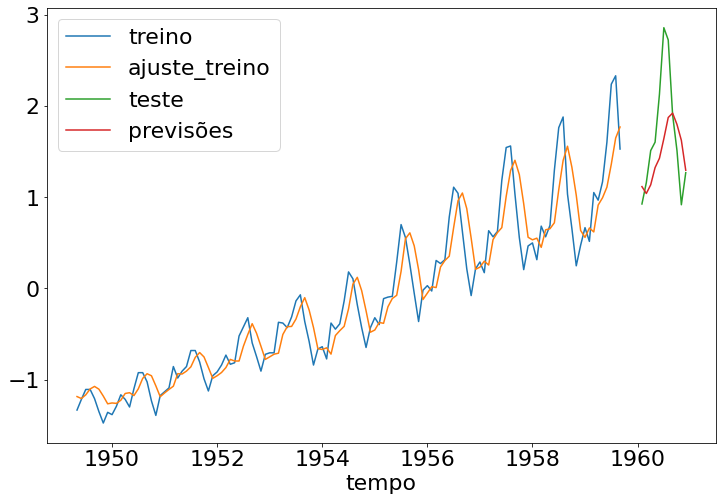

In [57]:
sns.lineplot(x='tempo', y=y_treino_4_passos, data = passageiros[4:129], label='treino')
sns.lineplot(x='tempo', y=resultado_treino.values, data = passageiros[4:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=y_teste_4_passos, data = passageiros[133:144], label='teste')
sns.lineplot(x='tempo', y=resultado_teste.values,  data = passageiros[133:144], label='previsões');

## **AULA 04 - Redes Recorrentes**

In [58]:
URL2 = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv'

In [59]:
bike = pd.read_csv(URL2)

In [60]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [61]:
#conversão de datas
bike['datas'] = pd.to_datetime(bike['datas'])

In [62]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


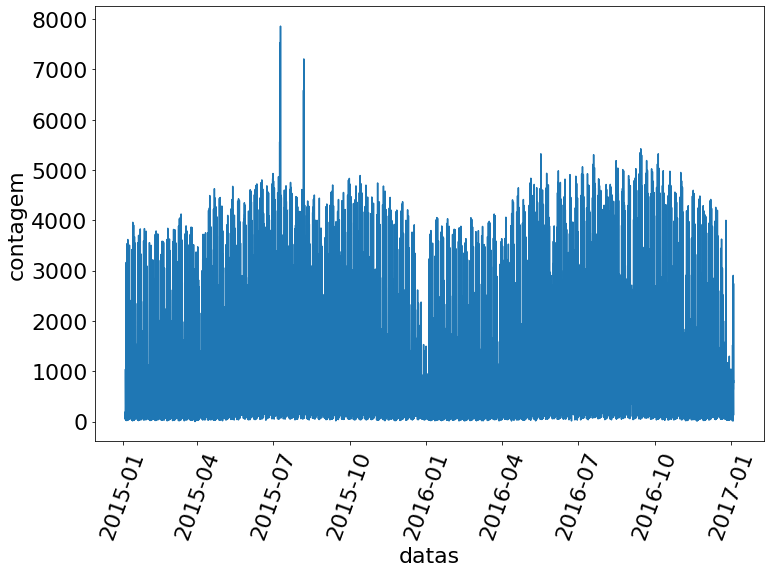

In [63]:
sns.lineplot(x='datas', y='contagem', data=bike)
plt.xticks(rotation=70);

In [64]:
#escalonando os dados
#vamos prever a contagem pela própria contagem
sc2 = StandardScaler()
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [65]:
y= sc2.transform(bike['contagem'].values.reshape(-1,1))

In [66]:
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike) - tamanho_treino

In [67]:
ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

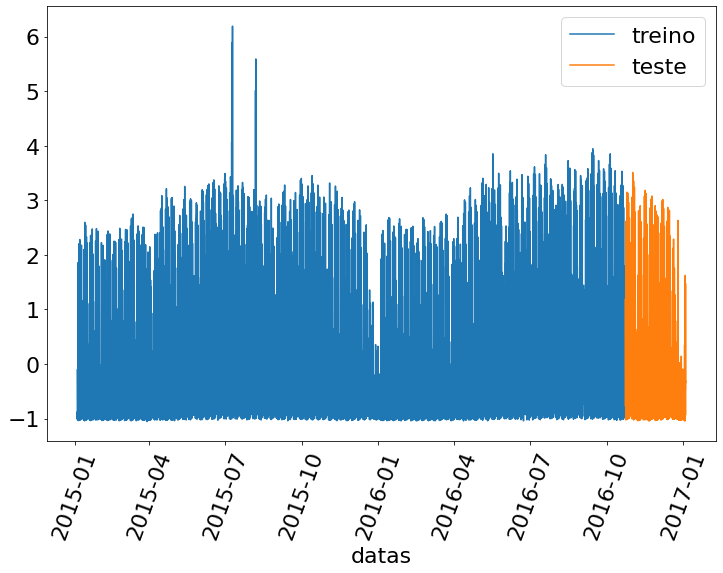

In [68]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label = 'treino')
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label = 'teste')
plt.xticks(rotation=70);


In [69]:
vetor = pd.DataFrame(ytreino)[0]

In [70]:
xtreino_novo, ytreino_novo = separa_dados(vetor,10)

In [71]:
vetor2 = pd.DataFrame(yteste)[0]

In [72]:
xteste_novo, yteste_novo = separa_dados(vetor2,10)

In [73]:
#vamos usar redes neurais recorrentes para resolver esse problema
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0], xtreino_novo.shape[1],1))

In [74]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0], xteste_novo.shape[1],1))

In [75]:
#criando um modelo recorrente
recorrente = Sequential()

In [76]:
#adicionando uma camada LSTM - Long Short Term Memory (memória de longo prazo)
recorrente.add(LSTM(128,input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))

In [77]:
#criando camada de saida
recorrente.add(Dense(units=1 ))

In [78]:
#compilando o modelo
recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')

In [79]:
recorrente.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


## **AULA 05 - Avaliando o Resultado**

In [80]:
#RMSProp trata o problema de Exploding Gradient, pois esta ocorrência evita que os pesos sejam calculados de forma correta
resultado = recorrente.fit(xtreino_novo,ytreino_novo, 
                           validation_data=(xteste_novo,yteste_novo), epochs=100)

Epoch 1/100
490/490 [==============================] - 6s 9ms/step - loss: 0.2555 - val_loss: 0.0883
Epoch 2/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0800 - val_loss: 0.0655
Epoch 3/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0549 - val_loss: 0.0394
Epoch 4/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0477 - val_loss: 0.0270
Epoch 5/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0427 - val_loss: 0.0634
Epoch 6/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0390 - val_loss: 0.0241
Epoch 7/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0368 - val_loss: 0.0309
Epoch 8/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0358 - val_loss: 0.0231
Epoch 9/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0341 - val_loss: 0.0215
Epoch 10/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0328 - val_lo

In [81]:
y_ajustado = recorrente.predict(xtreino_novo)

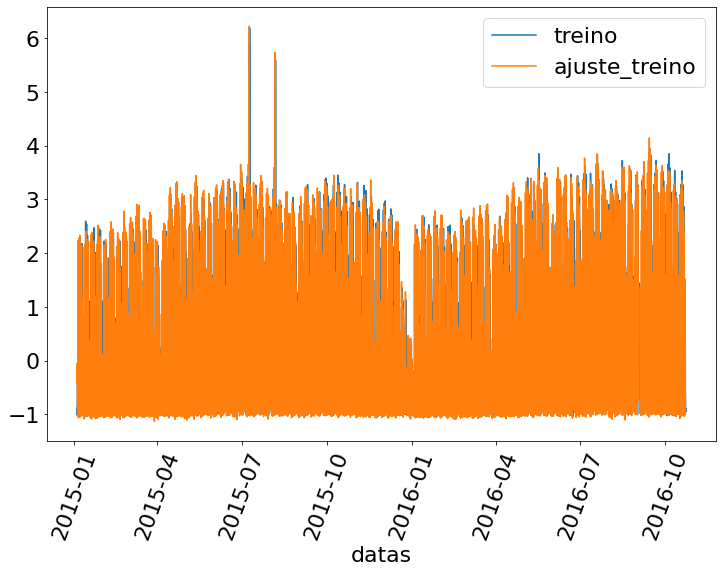

In [82]:
sns.lineplot(x='datas',y=ytreino[:,0], data=bike[:tamanho_treino], label='treino')
sns.lineplot(x='datas',y=y_ajustado[:,0], data=bike[:15662],label='ajuste_treino')
plt.xticks(rotation=70);

In [83]:
y_predito = recorrente.predict(xteste_novo)

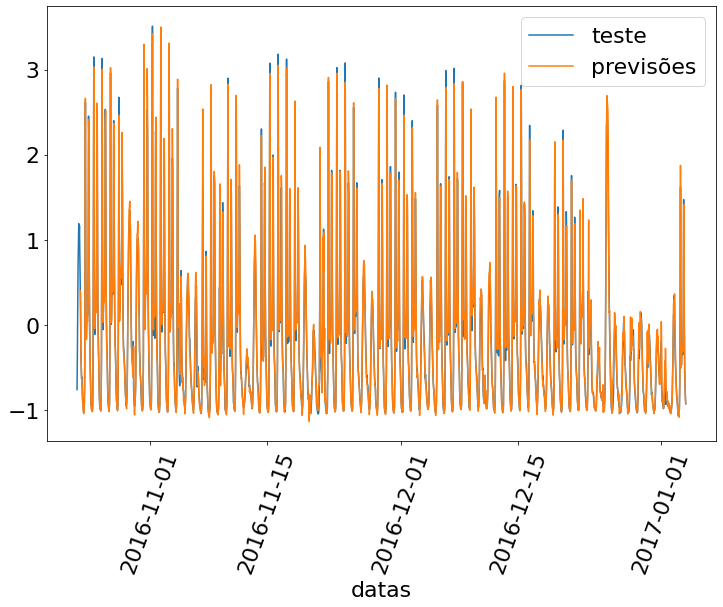

In [84]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')
sns.lineplot(x='datas',y=y_predito[:,0], data=bike[tamanho_treino+10:len(bike)],label='previsões')
plt.xticks(rotation=70);

In [85]:
#usando uma unidade recorrente fechada
recorrente_g = Sequential()
#camada de processamento
recorrente_g.add(GRU(128,input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
#camada de saída
recorrente_g.add(Dense(units=1))


In [86]:
#compilando o modelo
recorrente_g.compile(loss='mean_squared_error', optimizer='RMSProp')

In [87]:
#sumário do modelo GRU e LSTM
recorrente.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [88]:
recorrente_g.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 128)               50304     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [89]:
resultado2 = recorrente.fit(xtreino_novo, ytreino_novo, validation_data=(xteste_novo,yteste_novo),
                            epochs=100)

Epoch 1/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0162 - val_loss: 0.0160
Epoch 2/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0160 - val_loss: 0.0166
Epoch 3/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0157 - val_loss: 0.0173
Epoch 4/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0159 - val_loss: 0.0153
Epoch 5/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0157 - val_loss: 0.0175
Epoch 6/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0158 - val_loss: 0.0172
Epoch 7/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0156 - val_loss: 0.0156
Epoch 8/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0155 - val_loss: 0.0173
Epoch 9/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0154 - val_loss: 0.0173
Epoch 10/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0153 - val_lo

In [90]:
y_predito2 = recorrente_g.predict(xteste_novo)

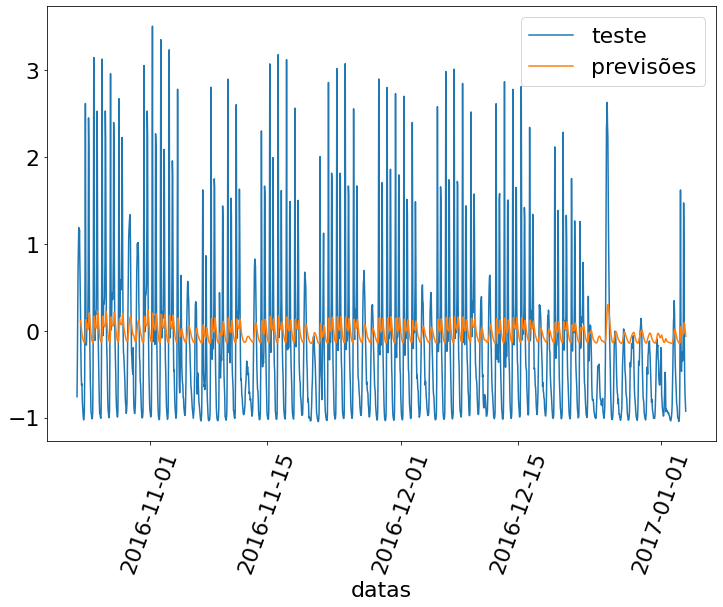

In [91]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')
sns.lineplot(x='datas',y=y_predito2[:,0], data=bike[tamanho_treino+10:len(bike)],label='previsões')
plt.xticks(rotation=70);

In [92]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


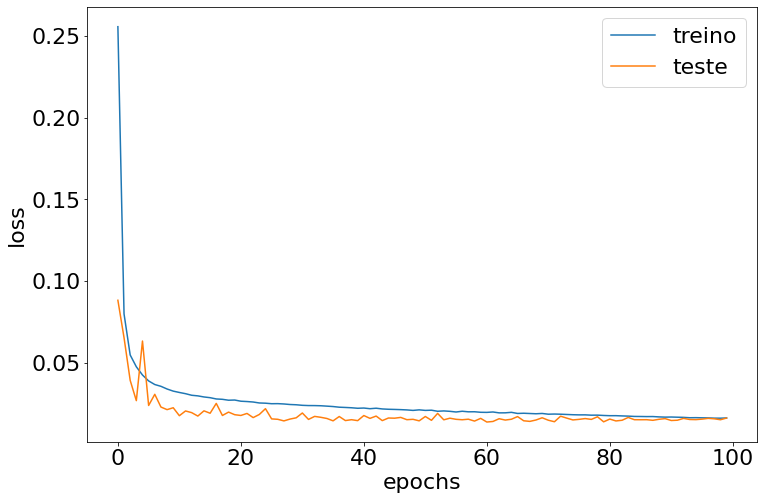

In [93]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino','teste'])
plt.xlabel('epochs')
plt.ylabel('loss');

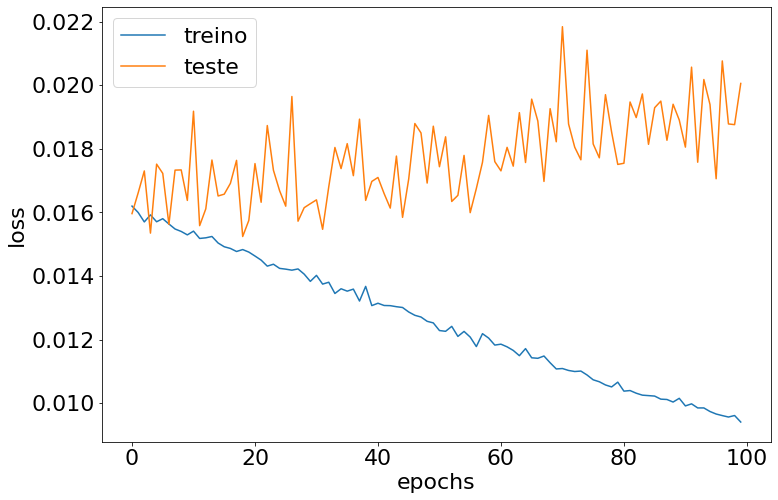

In [94]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino','teste'])
plt.xlabel('epochs')
plt.ylabel('loss');